In [21]:
using StatsBase, Plots
include("../code/slim_graphs.jl")
include("../code/matrix_generator.jl")

valid_degrees (generic function with 2 methods)

In [22]:
function findbasis_partial(H,Ht)
    rowperm, colperm = leaf_removal(H, Ht)
    Hnew = H[rowperm, colperm]
    ut2diagGF2!(Hnew)
    B = Hnew[:, size(Hnew, 1)+1:end]
end

findbasis_partial (generic function with 1 method)

In [23]:
f1 = 0.5
N1 = Int(N*f1)
Q = mod1(sum(digits(2N-N1)),3)
N1 = N1 + Q
N2 = N - N1
nedges = (N1+2N2)
M = Int(nedges/3)
Lambda = [N1, N2] / N
@assert sum(Lambda)==1
Rho = [0,0,1]

3-element Vector{Int64}:
 0
 0
 1

In [ ]:
f1s = 0:0.1:0.9
f1s = [0]
N = 10^6
horiz = []
vert = []
@showprogress for (i,f1) in enumerate(f1s)
    N1 = Int(N*f1)
    Q = mod1(sum(digits(2N-N1)),3)
    N1 = N1 + Q
    N2 = N - N1
    nedges = (N1+2N2)
    M = Int(nedges/3)
    Lambda = [N1, N2] / N
    @assert sum(Lambda)==1
    Rho = [0,0,1]
    Ht = ldpc_matrix(N, M, nedges, Lambda, Rho, accept_multi_edges=false)
    H = sparse(Ht')
    B = findbasis_partial(H, Ht)
    push!(horiz, vec(sum(B,dims=2)))
    push!(vert, vec(sum(B,dims=1)))
end

In [77]:
mylog(x) = iszero(x) ? 1e-10 : log10(x)

mylog (generic function with 1 method)

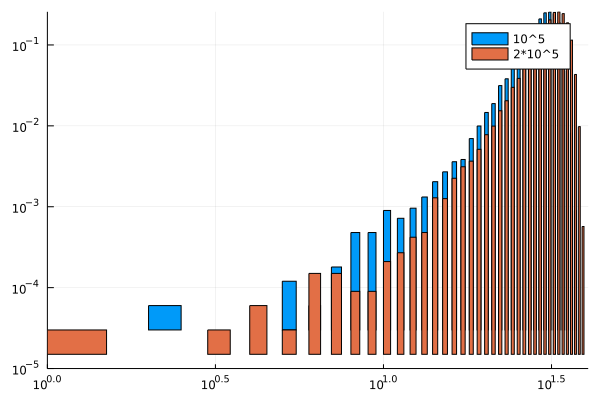

In [17]:
histogram!(h, vert[1], yaxis=(:log10,(1e-5,Inf)), xaxis=(:log10,(1,Inf)), normalize=:pdf, label="2*10^5")

maximum(v) = 37


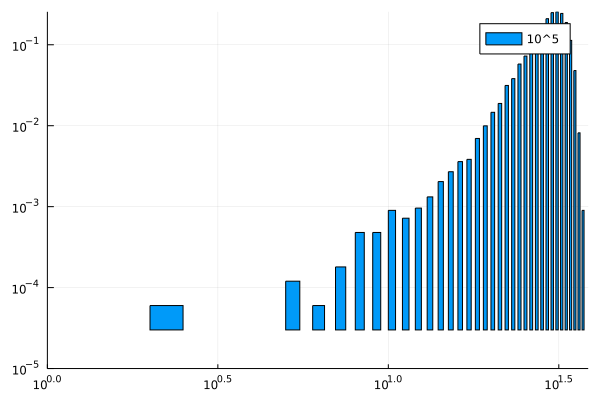

In [16]:
# v = vert[1]
@show maximum(v)
h = histogram(v, yaxis=(:log10,(1e-5,Inf)), xaxis=(:log10,(1,Inf)), normalize=:pdf, label="10^5")

In [ ]:
colors = cgrad(:cool, length(f1s)+1, categorical = true)
plv = plot()
for i in eachindex(f1s)
    hv = fit(Histogram, vert[i],nbins=20)
    hv = normalize(hv)
    plot!(plv, hv.edges[1][1:end-1], hv.weights, label="f1=$(f1s[i])", color=colors[i])
#     histogram!(plv, vert[i], yaxis=(:log10,(1e-5,Inf)), normalize=:pdf)
end
plot(plv, yaxis=(:log10,(1e-8,Inf)), xaxis=(:log10,(1,Inf)), title="Vertical weight",
    legend=:outertopright)

In [ ]:
colors = cgrad(:cool, length(f1s)+1, categorical = true)
plh = plot()
for i in 1:length(f1s)
    hh = fit(Histogram,horiz[i],nbins=10^4)
    hh = normalize(hh)
    plot!(plh, hh.edges[1][1:end-1], hh.weights, label="f1=$(f1s[i])", color=colors[i])
#     histogram!(plv, vert[i], yaxis=(:log10,(1e-5,Inf)), normalize=:pdf)
end
plot(plh, yaxis=(:log10,(1e-8,Inf)), xaxis=(:log10,(1,Inf)), title="Horizontal weight",
    legend=:outertopright)

In [37]:
i = 1
hh = fit(Histogram,horiz[i],nbins=10)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}}
edges:
  0.0:5000.0:35000.0
weights: [133298, 19, 7, 3, 2, 2, 2]
closed: left
isdensity: false

In [36]:
histogram(horiz[1], yaxis=(:log10,(1e-7,Inf)), xaxis=(:log10,(1,Inf)), normalize=:pdf)